<a href="https://colab.research.google.com/github/beatricekiplagat/Regression-Analysis/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2021_07_Beatrice_Kiplagat_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Ltd Regression Analysis

As a football analyst for Mchezopesa Ltd, I have been tasked to accomplish the task below:

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Approach 1: Polynomial approach
>
> Model 1: Predict how many goals the home team scores.
>
> Model 2: Predict how many goals the away team scores.

> Approach 2: Logistic approach
>
> Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### b) Defining the Metric for Success

> Our metrics for success for this project are to be able to create a model predict how many goals the home and away teams score using a polynomial approach, as well as create a model figuring out from the home team's perspective if the game is a win, loss or draw.

### c) Understanding the context 

> The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.
>
>A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.
>
>The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. Since 16 August 2018, the current version of the ranking system has adopted the Elo rating system used in chess and Go.
> The rankings are also used to determine the winners of the two annual awards national teams receive on the basis of their performance in the rankings.
>
>The (English) Football Association uses the average of the last 24 months of rankings as one of the criteria for player work permits.

### d) Recording the Experimental Design

We shall follow the following steps during this analysis:
1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Tidying the Data & Merging
5. Performing EDA
6. Check for Multicollinearity
7. Polynomial Regression
8. Logistic Regression
9. Challenging the Solution

### e) Data Relevance

> The data provided contains insights on different countries all over the world. We have two datasets.
>
> The first one contains data on features such as which country was the home team and which was the away team, the scores for each side, tournament type, city and country. The other dataset contains data on the countries' FIFA rankings. We have features such as the country, rank, total points, previous points, rank change ... among other features. 

## 2. Reading the Data

In [196]:
# Importing the libraries to be used
#
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics

# reading our csv files
ranking = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')


## 3. Checking the Data

In [197]:
# Determining the no. of records in both of our dataframes
#
print("Ranking dataframe")
print(ranking.shape)

print("\n \n Results dataframe")
print(results.shape)

Ranking dataframe
(57793, 16)

 
 Results dataframe
(40839, 9)


> The ranking dataframe has 16 columns & 57,793 entries while the results data frame has 9 columns and 40,839 rows.

In [198]:
# Previewing the top of our datasets
#
print("Ranking dataframe")
print(ranking.head(10))

print("\n \n Results dataframe")
print(results.head(10))

Ranking dataframe
   rank         country_full  ... confederation   rank_date
0     1              Germany  ...          UEFA  1993-08-08
1     2                Italy  ...          UEFA  1993-08-08
2     3          Switzerland  ...          UEFA  1993-08-08
3     4               Sweden  ...          UEFA  1993-08-08
4     5            Argentina  ...      CONMEBOL  1993-08-08
5     6  Republic of Ireland  ...          UEFA  1993-08-08
6     7               Russia  ...          UEFA  1993-08-08
7     8               Brazil  ...      CONMEBOL  1993-08-08
8     9               Norway  ...          UEFA  1993-08-08
9    10              Denmark  ...          UEFA  1993-08-08

[10 rows x 16 columns]

 
 Results dataframe
         date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3  1875-03-0

In [199]:
# Previewing the bottom of our datasets
# 
print("Ranking dataframe")
print(ranking.head(10))

print("\n \n Results dataframe")
print(results.head(10))

Ranking dataframe
   rank         country_full  ... confederation   rank_date
0     1              Germany  ...          UEFA  1993-08-08
1     2                Italy  ...          UEFA  1993-08-08
2     3          Switzerland  ...          UEFA  1993-08-08
3     4               Sweden  ...          UEFA  1993-08-08
4     5            Argentina  ...      CONMEBOL  1993-08-08
5     6  Republic of Ireland  ...          UEFA  1993-08-08
6     7               Russia  ...          UEFA  1993-08-08
7     8               Brazil  ...      CONMEBOL  1993-08-08
8     9               Norway  ...          UEFA  1993-08-08
9    10              Denmark  ...          UEFA  1993-08-08

[10 rows x 16 columns]

 
 Results dataframe
         date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3  1875-03-0

In [200]:
# Checking whether each column has an appropriate datatype
#
print("Ranking dataframe")
print(ranking.dtypes)

print("\n \n Results dataframe")
print(results.dtypes)

Ranking dataframe
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

 
 Results dataframe
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


> Apart from the dates, the rest of our datatypes are okay. Our date columns are objects in both datasets, thus we shall convert them to datetime

In [201]:
# Converting to datatime data type
import datetime

ranking.rank_date = pd.to_datetime(ranking.rank_date)
results.date = pd.to_datetime(results.date)


print("Ranking dataframe")
print(ranking.dtypes)

print("\n \n Results dataframe")
print(results.dtypes)



Ranking dataframe
rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

 
 Results dataframe
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [202]:
# Separating the dates to day, month and year for better analysis
#
ranking['day'] = ranking['rank_date'].dt.day
ranking['month'] = ranking['rank_date'].dt.month
ranking['year'] = ranking['rank_date'].dt.year

results['day'] = results['date'].dt.day
results['month'] = results['date'].dt.month
results['year'] = results['date'].dt.year

## 4. Tidying the Dataset & Merging

We will need to merge our dataframes in one, and perform data cleaning after each merge. we will need to rename some columns to achieve this

In [203]:
# Changing the column name of ;country' to 'country_full' on the results dataframe so that it corresponds with the column name on the ranking dataset
results = results.rename(columns = {'home_team' : 'country_full'})

In [204]:
# Merging the results and ranking dataframes by country and date to get ranking detail for the home team
#
home = results.merge(ranking, how = 'left', right_on = ['country_full','month','year','day'], left_on=['country_full','month','year','day'])
home

,date,country_full,away_team,home_score,away_score,tournament,city,country,neutral,day,month,year,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,11,1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,8,3,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,7,3,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,6,3,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,4,3,1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,18,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,18,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,19,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,19,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [205]:
# Checking for null values
#
home.isnull().sum()

date                           0
country_full                   0
away_team                      0
home_score                     0
away_score                     0
tournament                     0
city                           0
country                        0
neutral                        0
day                            0
month                          0
year                           0
rank                       39882
country_abrv               39882
total_points               39882
previous_points            39882
rank_change                39882
cur_year_avg               39882
cur_year_avg_weighted      39882
last_year_avg              39882
last_year_avg_weighted     39882
two_year_ago_avg           39882
two_year_ago_weighted      39882
three_year_ago_avg         39882
three_year_ago_weighted    39882
confederation              39882
rank_date                  39882
dtype: int64

In [206]:
# Dropping observed null values
home = home.dropna()
home.isnull().sum()

date                       0
country_full               0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
day                        0
month                      0
year                       0
rank                       0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [207]:
# Check for duplicates
#
home.duplicated().sum()

0

In [208]:
# Changing column title back to it's original title, so we can merge the away team, after changing the title on results dataset to correspond with the right columns 
#
home = home.rename(columns = {'country_full' : 'home_team'})
results = results.rename(columns = {'country_full' : 'home_team','away_team':'country_full'})

print("Home dataframe")
print(home.head(10))

print("\n \n Results dataframe")
print(results.head(10))

Home dataframe
            date     home_team  ... confederation  rank_date
17915 1993-08-08       Bolivia  ...      CONMEBOL 1993-08-08
17916 1993-08-08        Brazil  ...      CONMEBOL 1993-08-08
17917 1993-08-08       Ecuador  ...      CONMEBOL 1993-08-08
17918 1993-08-08        Guinea  ...           CAF 1993-08-08
17919 1993-08-08      Paraguay  ...      CONMEBOL 1993-08-08
17920 1993-08-08          Peru  ...      CONMEBOL 1993-08-08
17921 1993-08-08      Zimbabwe  ...           CAF 1993-08-08
17977 1993-09-23  Saudi Arabia  ...           AFC 1993-09-23
18186 1994-03-15         Gabon  ...           CAF 1994-03-15
18187 1994-03-15        Israel  ...          UEFA 1994-03-15

[10 rows x 27 columns]

 
 Results dataframe
        date home_team country_full  home_score  ...  neutral day month  year
0 1872-11-30  Scotland      England           0  ...    False  30    11  1872
1 1873-03-08   England     Scotland           4  ...    False   8     3  1873
2 1874-03-07  Scotland      Englan

In [209]:
# Merging the results and ranking dataframes by country and date to get ranking details for the away team
#
away = results.merge(ranking, how = 'left', right_on = ['country_full','month','year','day'], left_on=['country_full','month','year','day'])
away

,date,home_team,country_full,home_score,away_score,tournament,city,country,neutral,day,month,year,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,11,1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,8,3,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,7,3,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,6,3,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,4,3,1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,18,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,18,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,19,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,19,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [210]:
# Checking for null values
#
away.isnull().sum()

date                           0
home_team                      0
country_full                   0
home_score                     0
away_score                     0
tournament                     0
city                           0
country                        0
neutral                        0
day                            0
month                          0
year                           0
rank                       39906
country_abrv               39906
total_points               39906
previous_points            39906
rank_change                39906
cur_year_avg               39906
cur_year_avg_weighted      39906
last_year_avg              39906
last_year_avg_weighted     39906
two_year_ago_avg           39906
two_year_ago_weighted      39906
three_year_ago_avg         39906
three_year_ago_weighted    39906
confederation              39906
rank_date                  39906
dtype: int64

In [211]:
# Dropping observed null values
away = away.dropna()
away.isnull().sum()

date                       0
home_team                  0
country_full               0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
day                        0
month                      0
year                       0
rank                       0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [212]:
# Check for duplicates
#
away.duplicated().sum()

0

In [213]:
# Change back the original column name fo 'country full' on away data set, so we can do the final merge
#
away = away.rename(columns = {'country_full' : 'away_team'})
away

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day,month,year,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,8,1993,22.0,URU,0.00,47.0,-6.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,8,1993,14.0,MEX,0.00,42.0,11.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,1993-08-08
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,8,1993,94.0,VEN,0.00,4.0,31.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,8,1993,86.0,SLE,0.00,16.0,-7.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,8,1993,5.0,ARG,0.00,51.0,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39821,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False,7,6,2018,95.0,UZB,353.91,381.0,-7.0,66.85,66.85,305.61,152.80,311.74,93.52,203.71,40.74,AFC,2018-06-07
39822,2018-06-07,Portugal,Algeria,3,0,Friendly,Lisbon,Portugal,False,7,6,2018,66.0,ALG,473.83,499.0,-2.0,163.41,163.41,234.78,117.39,304.68,91.40,508.13,101.63,CAF,2018-06-07
39823,2018-06-07,South Korea,Bolivia,0,0,Friendly,Innsbruck,Austria,True,7,6,2018,59.0,BOL,536.08,548.0,-2.0,291.14,291.14,313.86,156.93,222.28,66.68,106.60,21.32,CONMEBOL,2018-06-07
39824,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False,7,6,2018,47.0,GHA,623.69,603.0,3.0,261.21,261.21,339.92,169.96,332.99,99.90,463.15,92.63,CAF,2018-06-07


In [214]:
# Final merge for the away and home datasets into one for our analysis
#
football = home.merge(away, how='left', left_on = ['date','home_team','away_team','tournament'],right_on = ['date','home_team','away_team','tournament'])
football

,date,home_team,away_team,home_score_x,away_score_x,tournament,city_x,country_x,neutral_x,day_x,month_x,year_x,rank_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,home_score_y,away_score_y,city_y,country_y,neutral_y,day_y,month_y,year_y,rank_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,8,1993,59.0,BOL,0.00,13.0,28.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,3.0,1.0,La Paz,Bolivia,False,8.0,8.0,1993.0,22.0,URU,0.00,47.0,-6.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,8,1993,8.0,BRA,0.00,55.0,-5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1.0,1.0,Maceió,Brazil,False,8.0,8.0,1993.0,14.0,MEX,0.00,42.0,11.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,8,1993,35.0,ECU,0.00,23.0,30.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,5.0,0.0,Quito,Ecuador,False,8.0,8.0,1993.0,94.0,VEN,0.00,4.0,31.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,8,1993,65.0,GUI,0.00,23.0,-2.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1.0,0.0,Conakry,Guinea,False,8.0,8.0,1993.0,86.0,SLE,0.00,16.0,-7.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,8,1993,67.0,PAR,0.00,22.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1.0,3.0,Asunción,Paraguay,False,8.0,8.0,1993.0,5.0,ARG,0.00,51.0,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,2018-06-07,England,Costa Rica,2,0,Friendly,Leeds,England,False,7,6,2018,12.0,ENG,1050.84,1040.0,1.0,476.42,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07,2.0,0.0,Leeds,England,False,7.0,6.0,2018.0,23.0,CRC,884.04,858.0,2.0,410.90,410.90,480.58,240.29,332.44,99.73,665.55,133.11,CONCACAF,2018-06-07
953,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False,7,6,2018,14.0,URU,1018.41,976.0,3.0,486.28,486.28,487.69,243.84,561.47,168.44,599.26,119.85,CONMEBOL,2018-06-07,3.0,0.0,Montevideo,Uruguay,False,7.0,6.0,2018.0,95.0,UZB,353.91,381.0,-7.0,66.85,66.85,305.61,152.80,311.74,93.52,203.71,40.74,AFC,2018-06-07
954,2018-06-07,Portugal,Algeria,3,0,Friendly,Lisbon,Portugal,False,7,6,2018,4.0,POR,1273.69,1306.0,0.0,646.92,646.92,691.82,345.91,517.77,155.33,627.63,125.53,UEFA,2018-06-07,3.0,0.0,Lisbon,Portugal,False,7.0,6.0,2018.0,66.0,ALG,473.83,499.0,-2.0,163.41,163.41,234.78,117.39,304.68,91.40,508.13,101.63,CAF,2018-06-07
955,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False,7,6,2018,22.0,ISL,908.01,930.0,0.0,438.64,438.64,564.25,282.13,302.02,90.61,483.19,96.64,UEFA,2018-06-07,2.0,2.0,Reykjavík,Iceland,False,7.0,6.0,2018.0,47.0,GHA,623.69,603.0,3.0,261.21,261.21,339.92,169.96,332.99,99.90,463.15,92.63,CAF,2018-06-07


In [215]:
# Checking for null values
#
football.isnull().sum()

date                          0
home_team                     0
away_team                     0
home_score_x                  0
away_score_x                  0
tournament                    0
city_x                        0
country_x                     0
neutral_x                     0
day_x                         0
month_x                       0
year_x                        0
rank_x                        0
country_abrv_x                0
total_points_x                0
previous_points_x             0
rank_change_x                 0
cur_year_avg_x                0
cur_year_avg_weighted_x       0
last_year_avg_x               0
last_year_avg_weighted_x      0
two_year_ago_avg_x            0
two_year_ago_weighted_x       0
three_year_ago_avg_x          0
three_year_ago_weighted_x     0
confederation_x               0
rank_date_x                   0
home_score_y                 86
away_score_y                 86
city_y                       86
country_y                    86
neutral_

In [216]:
# Dropping observed null values
football = football.dropna()
football.isnull().sum()

date                         0
home_team                    0
away_team                    0
home_score_x                 0
away_score_x                 0
tournament                   0
city_x                       0
country_x                    0
neutral_x                    0
day_x                        0
month_x                      0
year_x                       0
rank_x                       0
country_abrv_x               0
total_points_x               0
previous_points_x            0
rank_change_x                0
cur_year_avg_x               0
cur_year_avg_weighted_x      0
last_year_avg_x              0
last_year_avg_weighted_x     0
two_year_ago_avg_x           0
two_year_ago_weighted_x      0
three_year_ago_avg_x         0
three_year_ago_weighted_x    0
confederation_x              0
rank_date_x                  0
home_score_y                 0
away_score_y                 0
city_y                       0
country_y                    0
neutral_y                    0
day_y   

In [217]:
# Check for duplicates
#
football.duplicated().sum()

0

We shll now proceed to do data cleaning using the data cleaning principles.

In [218]:
# Dropping irrelevant columns
#
column_names = ['home_team','home_score_x','away_team','away_score_x','year_x','rank_x','rank_y','tournament']
football = football.reindex(columns = column_names)
football

,home_team,home_score_x,away_team,away_score_x,year_x,rank_x,rank_y,tournament
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification
...,...,...,...,...,...,...,...,...
952,England,2,Costa Rica,0,2018,12.0,23.0,Friendly
953,Uruguay,3,Uzbekistan,0,2018,14.0,95.0,Friendly
954,Portugal,3,Algeria,0,2018,4.0,66.0,Friendly
955,Iceland,2,Ghana,2,2018,22.0,47.0,Friendly


In [219]:
# Renaming the columns
#
football = football.rename(columns = {'home_score_x' : 'home_team_score','away_score_x' : 'away_team_score','year_x' : 'year','rank_x' : 'home_team_rank','rank_y' : 'away_team_rank'})
football

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification
...,...,...,...,...,...,...,...,...
952,England,2,Costa Rica,0,2018,12.0,23.0,Friendly
953,Uruguay,3,Uzbekistan,0,2018,14.0,95.0,Friendly
954,Portugal,3,Algeria,0,2018,4.0,66.0,Friendly
955,Iceland,2,Ghana,2,2018,22.0,47.0,Friendly


In [220]:
# Chcking data types of our new merged dataframe
#
football.dtypes

home_team           object
home_team_score      int64
away_team           object
away_team_score      int64
year                 int64
home_team_rank     float64
away_team_rank     float64
tournament          object
dtype: object

In [221]:
# Check shape of our dataset
#
football.shape

(871, 8)

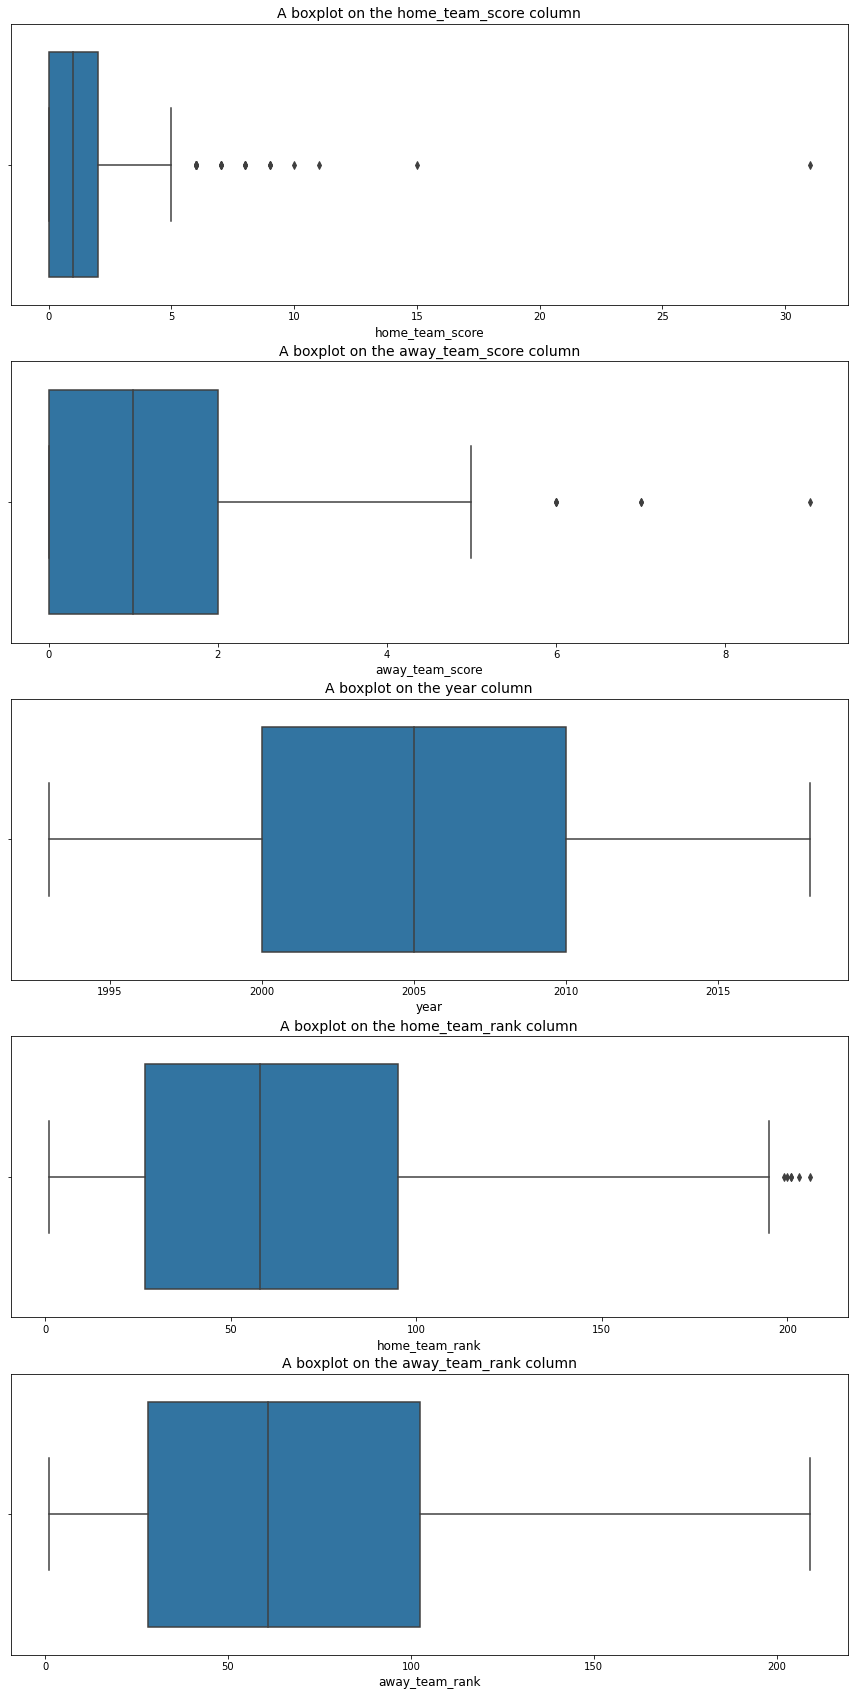

In [222]:
# Checking for Outliers & Anomalies

#
col_names = ['home_team_score','away_team_score','year','home_team_rank','away_team_rank']

fig, ax = plt.subplots(len(col_names), figsize = (15,30))

for i, col_val in enumerate(col_names):

  sns.boxplot(x = football[col_val], ax=ax[i])
  ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
  ax[i].set_xlabel(col_val, fontsize=12)
  
# We wont drop the outliers for now

In [223]:
# We don't have any columns showing whether the teams won, lost or drew, thus we shall create a column with these results, checking on the scores
#
football.loc[football['home_team_score'] > football['away_team_score'], 'game_results'] = 'Win'
football.loc[football['home_team_score'] < football['away_team_score'], 'game_results'] = 'Lose'
football.loc[football['home_team_score'] == football['away_team_score'], 'game_results'] = 'Draw'
football

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification,Win
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly,Draw
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification,Win
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly,Win
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification,Lose
...,...,...,...,...,...,...,...,...,...
952,England,2,Costa Rica,0,2018,12.0,23.0,Friendly,Win
953,Uruguay,3,Uzbekistan,0,2018,14.0,95.0,Friendly,Win
954,Portugal,3,Algeria,0,2018,4.0,66.0,Friendly,Win
955,Iceland,2,Ghana,2,2018,22.0,47.0,Friendly,Draw


In [224]:
# Adding a column containing total scores on our dataframe for ease of analysis
#
football['total_scores'] = football['home_team_score'] + football['away_team_score']
football

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification,Win,4
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly,Draw,2
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification,Win,5
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly,Win,1
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification,Lose,4
...,...,...,...,...,...,...,...,...,...,...
952,England,2,Costa Rica,0,2018,12.0,23.0,Friendly,Win,2
953,Uruguay,3,Uzbekistan,0,2018,14.0,95.0,Friendly,Win,3
954,Portugal,3,Algeria,0,2018,4.0,66.0,Friendly,Win,3
955,Iceland,2,Ghana,2,2018,22.0,47.0,Friendly,Draw,4


In [225]:
# Adding a column with the match title
#
football['match'] = football['home_team'] + ' Vs ' + football['away_team']
football

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores,match
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification,Win,4,Bolivia Vs Uruguay
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly,Draw,2,Brazil Vs Mexico
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification,Win,5,Ecuador Vs Venezuela
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly,Win,1,Guinea Vs Sierra Leone
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification,Lose,4,Paraguay Vs Argentina
...,...,...,...,...,...,...,...,...,...,...,...
952,England,2,Costa Rica,0,2018,12.0,23.0,Friendly,Win,2,England Vs Costa Rica
953,Uruguay,3,Uzbekistan,0,2018,14.0,95.0,Friendly,Win,3,Uruguay Vs Uzbekistan
954,Portugal,3,Algeria,0,2018,4.0,66.0,Friendly,Win,3,Portugal Vs Algeria
955,Iceland,2,Ghana,2,2018,22.0,47.0,Friendly,Draw,4,Iceland Vs Ghana


## 5. Exploratory Data Analysis

### a) Univariate Analysis

#### Summary Statistics

In [226]:
# Getting summary statistics for our numerical columns
football.describe()

,home_team_score,away_team_score,year,home_team_rank,away_team_rank,total_scores
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,2004.789897,65.549943,69.918485,2.637199
std,1.905960,1.154691,5.405888,47.557993,50.497652,2.093601
min,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,2000.000000,27.000000,28.000000,1.000000
50%,1.000000,1.000000,2005.000000,58.000000,61.000000,2.000000
75%,2.000000,2.000000,2010.000000,95.000000,102.500000,4.000000
max,31.000000,9.000000,2018.000000,206.000000,209.000000,31.000000


In [326]:
# Measures of Central Tendency
#
football_num = football[['home_team_score',	'away_team_score',	'year',	'home_team_rank',	'away_team_rank',	'total_scores']]
print('The means of our numerical values are \n', football_num.mean())
print('\n The medians of our numerical values are\n', football_num.median())

# Measures of Dispersion
print('\nThe standard deviations of our numerical values are\n', football_num.std())
print('\n The variances of our numerical values are\n', football_num.var())


The means of our numerical values are 
 home_team_score       1.632606
away_team_score       1.004592
year               2004.789897
home_team_rank       65.549943
away_team_rank       69.918485
total_scores          2.637199
dtype: float64

 The medians of our numerical values are
 home_team_score       1.0
away_team_score       1.0
year               2005.0
home_team_rank       58.0
away_team_rank       61.0
total_scores          2.0
dtype: float64

The standard deviations of our numerical values are
 home_team_score     1.905960
away_team_score     1.154691
year                5.405888
home_team_rank     47.557993
away_team_rank     50.497652
total_scores        2.093601
dtype: float64

 The variances of our numerical values are
 home_team_score       3.632683
away_team_score       1.333312
year                 29.223622
home_team_rank     2261.762733
away_team_rank     2550.012888
total_scores          4.383166
dtype: float64


#### Plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

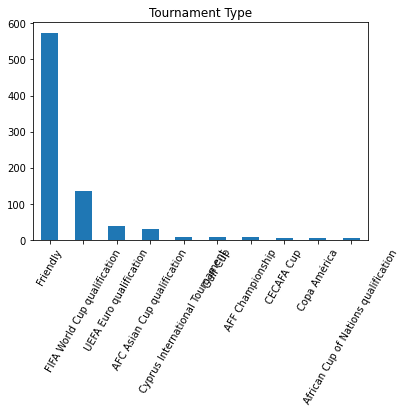

In [228]:
# Bar graph showing distribution of tournament types
#
football.tournament.value_counts().head(10).plot.bar()
plt.title('Tournament Type')
degrees = 60
plt.xticks(rotation=degrees)

### b) Bivariate Analysis

In [229]:
# Check for correlation
#
correlation = football.corr()
correlation

,home_team_score,away_team_score,year,home_team_rank,away_team_rank,total_scores
home_team_score,1.000000,-0.132413,-0.008058,-0.043381,0.309322,0.837344
away_team_score,-0.132413,1.000000,-0.044407,0.143060,-0.151524,0.430988
year,-0.008058,-0.044407,1.000000,0.212261,0.268029,-0.031828
home_team_rank,-0.043381,0.143060,0.212261,1.000000,0.534618,0.039409
away_team_rank,0.309322,-0.151524,0.268029,0.534618,1.000000,0.198028
total_scores,0.837344,0.430988,-0.031828,0.039409,0.198028,1.000000


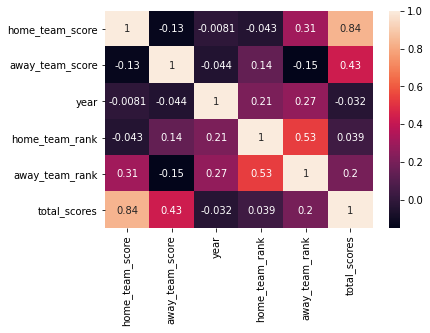

In [230]:
# Plotting a correlation heatmap
#
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

## 6. Check for Multicollinearity

In [231]:
# We shall use the correlation above to check for multicollinearity using the VIF Score
#
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)


,home_team_score,away_team_score,year,home_team_rank,away_team_rank,total_scores
home_team_score,5.448898e+13,3.301117e+13,0.014673,0.287678,-0.408866,-5.985342e+13
away_team_score,3.301117e+13,1.999922e+13,-0.014482,-0.367445,0.427693,-3.626111e+13
year,1.471756e-02,-1.445501e-02,1.093202,-0.088774,-0.269227,8.551368e-02
home_team_rank,2.878459e-01,-3.673436e-01,-0.088774,1.612573,-0.992410,4.744387e-02
away_team_rank,-4.088658e-01,4.276926e-01,-0.269227,-0.992410,1.828354,-1.734935e-01
total_scores,-5.985342e+13,-3.626111e+13,0.085562,0.047628,-0.173493,6.574598e+13


> The VIF score for each variable is found alongside the downwards sloping diagonal. None of our scores have a VIF of above 5, thus we can conclude that the correlation in our independent variables is really low and can be ignored. Had it been 5 or more, we would have been an issue for us.


## 7. Polynomial Regression

In [232]:
# Creating a copy of our dataframe
df = football.copy()

In [233]:
# Encoding our categorical columns
#
label_encoder = LabelEncoder()
# home_team
label_encoder.fit(df['home_team'])
df['home_team'] = label_encoder.transform(df['home_team'])

# away_team
label_encoder.fit(df['away_team'])
df['away_team'] = label_encoder.transform(df['away_team'])

#tournament
label_encoder.fit(df['tournament'])
df['tournament'] = label_encoder.transform(df['tournament'])

# game results
label_encoder.fit(df['game_results'])
df['game_results'] = label_encoder.transform(df['game_results'])

# match
label_encoder.fit(df['match'])
df['match'] = label_encoder.transform(df['match'])

# year
label_encoder.fit(df['year'])
df['year'] = label_encoder.transform(df['year'])

# Preview th dataset
df

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores,match
0,20,3,150,1,0,59.0,22.0,16,2,4,83
1,23,1,90,1,0,8.0,14.0,17,0,2,92
2,40,5,153,0,0,35.0,94.0,16,2,5,188
3,59,1,125,0,0,65.0,86.0,17,2,1,279
4,111,1,7,3,0,67.0,5.0,16,1,4,521
...,...,...,...,...,...,...,...,...,...,...,...
952,43,2,35,0,25,12.0,23.0,17,2,2,199
953,151,3,151,0,25,14.0,95.0,17,2,3,762
954,115,3,2,0,25,4.0,66.0,17,2,3,548
955,65,2,56,2,25,22.0,47.0,17,0,4,306


#### Model 1: Predict how many goals the home team scores.

In [262]:
# Assigning X & Y to our independent and dependent variables
#
X_home = df[['home_team_rank','away_team_rank','tournament']].values
y_home = df['home_team_score'].values

In [263]:
# Split the dataset into train and test sets
#
X_train, X_test, home_train, home_test = train_test_split(X_home,y_home, test_size = 0.2, random_state=0)


In [264]:
# Standardizing our data
#
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [265]:
# Fit our dataset to polynomial Regression
#
poly_reg = PolynomialFeatures(degree = 4) 
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)


pol_reg = LinearRegression()
pol_reg.fit(X_train,home_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting
#
home_predict = pol_reg.predict(X_test)
home_predict

In [267]:
# Compute RMSE
#
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(home_test, home_predict))
rmse

1.5315071620776417

> Our RMSE is 1.5315, we shall now do Bartlett test

In [268]:
# Using Bartlett test to check the homogeneity of our dataset
#
residuals = np.subtract(home_predict, home_test)

pd.DataFrame(residuals).describe()

residuals.mean()

test_result, p_value = sp.stats.bartlett(home_predict, residuals)

degree_of_freedom = len(home_predict) - 1

probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
    print('There are patterns to the variance of the data')
if (test_result < critical_value):
  print('The variance is homogenous across our data')

The variance is homogenous across our data


####Cross Validation

In [277]:
# We shall crosvalidate to check the skill of our model.
#
folds = KFold(n_splits=10)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess models based on the folds we created.

RMSES = [] # We will use this array to keep track of the RMSE of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X_home):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
  X_train, X_test = X_home[train_index], X_home[test_index]
  home_train, home_test = y_home[train_index], y_home[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, home_train)
  
  # assess the accuraccy of the model
  home_predict = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(home_test, home_predict))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

print("\nThe mean of our RMSEs is ", np.mean(RMSES))

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4297526810930787

Training model 2
Model 2 Root Mean Squared Error: 1.5184071886401382

Training model 3
Model 3 Root Mean Squared Error: 3.267106363063609

Training model 4
Model 4 Root Mean Squared Error: 1.2119095487731706

Training model 5
Model 5 Root Mean Squared Error: 1.8771033743701577

Training model 6
Model 6 Root Mean Squared Error: 1.4172777607682696

Training model 7
Model 7 Root Mean Squared Error: 1.260296363686627

Training model 8
Model 8 Root Mean Squared Error: 1.2672407024858294

Training model 9
Model 9 Root Mean Squared Error: 1.337334513287353

Training model 10
Model 10 Root Mean Squared Error: 2.03599762453511

The mean of our RMSEs is  1.6622426120703342


Our RMSEs for the different models are fairly close together, except for model 10 & model 3. These two may have the most outliers, as we did not remove them during data cleaning. The mean of our RMSEs is also close to the RMSE for our model. However it may be worthwhile to use model 2 as it is the closest to our model.


#### Residual Plots & Heteroscedasticity

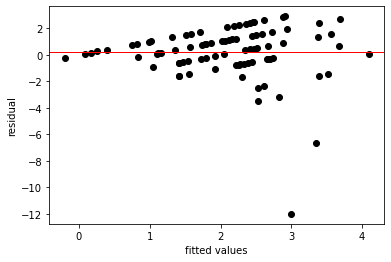

In [304]:
# Plotting our residual plots
#
residuals = np.subtract(home_predict, home_test)
plt.scatter(home_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#### Model 2: Predict how many goals the away team scores.

> Our residuals have a pattern, thus there may be an issue with the correctness of our model for prediction. We may therefore need to redefine our variables.

In [281]:
# Assigning X & Y to our independent and dependent variables
#
X_away = df[['home_team_rank','away_team_rank','tournament']].values
y_away = df['away_team_score'].values

In [299]:
# Split the dataset into train and test sets
#
X_train_away, X_test_away, away_train, away_test = train_test_split(X_away , y_away, test_size=0.2, random_state = 0)

In [300]:
# Standardizing our data
#
feature_scaler = StandardScaler()
X_train_away = feature_scaler.fit_transform(X_train_away)
X_test_away = feature_scaler.transform(X_test_away)

In [301]:
# Fit our dataset to polynomial Regression
#
poly_reg = PolynomialFeatures(degree = 4) 
X_train_away = poly_reg.fit_transform(X_train_away)
X_test_away = poly_reg.fit_transform(X_test_away)


pol_reg = LinearRegression()
pol_reg.fit(X_train_away, away_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
# Predicting 
#
away_predict = pol_reg.predict(X_test_away)

In [303]:
# Compute RMSE
#
from sklearn.metrics import mean_squared_error
rmse2 = np.sqrt(mean_squared_error(away_test, away_predict))
rmse2

1.3445336116291566

> Our RMSE is 0.98781, we shall now check for homogeneity

In [274]:
# Using Bartlett test to check the homogeneity of our dataset
#
residuals = np.subtract(away_predict, away_test)

pd.DataFrame(residuals).describe()

residuals.mean()

test_result, p_value = sp.stats.bartlett(home_predict, residuals)

degree_of_freedom = len(home_predict) - 1

probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
    print('There are patterns to the variance of the data')
if (test_result < critical_value):
  print('The variance is homogenous across our data')

The variance is homogenous across our data


#### Cross Validation

In [287]:
# We shall crosvalidate to check the skill of our model.
#
folds = KFold(n_splits=10)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess models based on the folds we created.

RMSES = [] # We will use this array to keep track of the RMSE of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X_away):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
  X_train_away, X_test_away = X_away[train_index], X_away[test_index]
  away_train, away_test = y_away[train_index], y_away[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train_away, away_train)
  
  # assess the accuraccy of the model
  away_predict = regressor.predict(X_test_away)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(away_test, away_predict))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

print("\nThe mean of our RMSEs is ", np.mean(RMSES))

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1050533087274415

Training model 2
Model 2 Root Mean Squared Error: 0.9927110387616627

Training model 3
Model 3 Root Mean Squared Error: 1.2860044935154484

Training model 4
Model 4 Root Mean Squared Error: 1.1863548493974092

Training model 5
Model 5 Root Mean Squared Error: 1.1893419536021443

Training model 6
Model 6 Root Mean Squared Error: 1.189700818774265

Training model 7
Model 7 Root Mean Squared Error: 1.0981493808080283

Training model 8
Model 8 Root Mean Squared Error: 0.8724205553142826

Training model 9
Model 9 Root Mean Squared Error: 1.0872499356231318

Training model 10
Model 10 Root Mean Squared Error: 0.9801519247968117

The mean of our RMSEs is  1.0987138259320623


> Our RMSEs are a little further below our model's RMSE, thus we could tune our data a little for better results.

#### Residual Plots & Heteroscedasticity

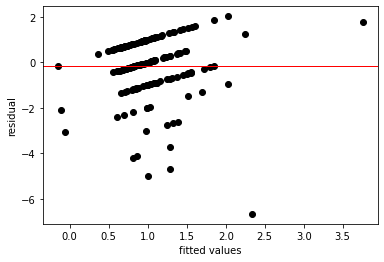

In [306]:
# Plotting our residual plots
#
residuals = np.subtract(away_predict, away_test)
plt.scatter(away_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

> Our residuals have a pattern, thus there may be an issue with the correctness of our model for prediction. We may therefore need to redefine our variables.

## 8. Logistic Regression

In [307]:
# Preview our dataset
#
df

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores,match
0,20,3,150,1,0,59.0,22.0,16,2,4,83
1,23,1,90,1,0,8.0,14.0,17,0,2,92
2,40,5,153,0,0,35.0,94.0,16,2,5,188
3,59,1,125,0,0,65.0,86.0,17,2,1,279
4,111,1,7,3,0,67.0,5.0,16,1,4,521
...,...,...,...,...,...,...,...,...,...,...,...
952,43,2,35,0,25,12.0,23.0,17,2,2,199
953,151,3,151,0,25,14.0,95.0,17,2,3,762
954,115,3,2,0,25,4.0,66.0,17,2,3,548
955,65,2,56,2,25,22.0,47.0,17,0,4,306


In [327]:
# Assigning X & Y to our independent and dependent variables
#
X_Log = df.drop(['game_results'],axis=1).values
y_log = df['game_results'].values

In [328]:
# Splitting our data into train and test sets
#
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_Log, y_log, test_size=0.3,random_state=25)

In [329]:
# Fit our dataset to logistic regression
#
LogReg = LogisticRegression()
LogReg.fit(X_train_log, y_train_log)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [330]:
# Predicting
#
y_predict_log = LogReg.predict(X_test_log)

In [331]:
#Creating a confusion matrix to get the accuracy of our model.
#
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test_log,y_predict_log)
confusion_matrix

array([[ 31,  16,  23],
       [ 10,  52,   1],
       [ 17,   0, 112]])

In [332]:
LogReg.score(X_test_log, y_test_log)

0.7442748091603053

> Our logistic regression has an accuracy of 74%. 

#### Cross Validation

In [333]:
#Cross Validating our data
#
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, random_state=0)
from sklearn.model_selection import cross_val_score

all_accuracies = cross_val_score(estimator = classifier, X = X_train_log, y=y_train_log,cv=5)
print(all_accuracies.mean())

0.991749085489771


> Upon validation, we see that we have an accuracy of 99%

# 9. Challenging the Solution
> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.